# VISUALIZACIÓN
---

In [1]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings("ignore")

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


*NOTA*: las gráficas no varían en función del csv utilizado.

In [2]:
df = pd.read_csv("../datos/02-bikes_limpio.csv", index_col= 0).reset_index(drop= True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670
2,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,1454
4,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,1518


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  registered  730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 68.6+ KB


In [4]:
# Volvemos a cambiar a category algunas columnas ya que se modifican al guardar y cargar
df[["yr", "mnth", "holiday", "weekday", "workingday"]] = df[["yr", "mnth", "holiday", "weekday", "workingday"]].astype("category")

### Distribución variable *Registered*

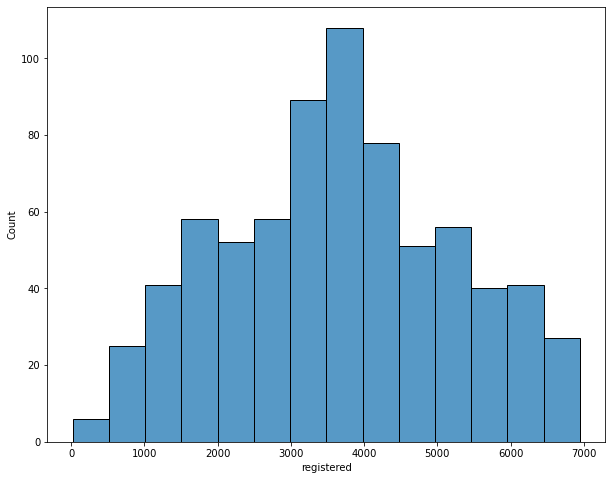

In [5]:
sns.histplot(data = df, x = "registered");

### Correlación

Hacemos un heatmap para ver la correlación de las variables numéricas por si hay alguna con valores redundantes

In [6]:
masc = np.triu(np.ones_like(df.corr(), dtype=np.bool_))

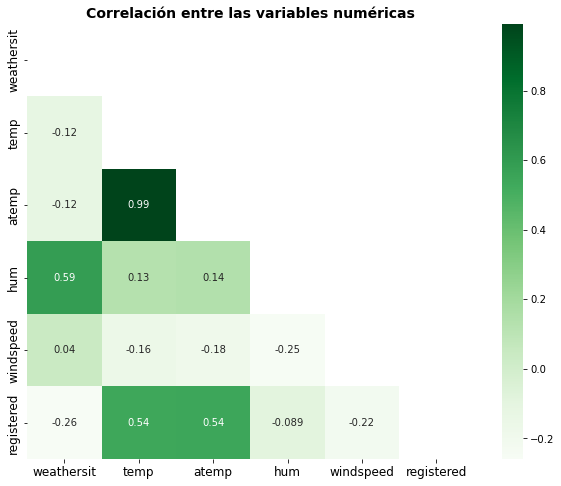

In [8]:
sns.heatmap(df.corr(), mask= masc, annot= True, cmap= "Greens")
plt.title(label = "Correlación entre las variables numéricas", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
plt.savefig("../imagenes/correlacion.png", facecolor= "w");

Podemos observar que se puede eliminar la columna temp o atemp, una de las 2

### Variables numéricas

In [9]:
# Hacemos una lista con las columnas que queremos comparar con la columna "registered"
lista_columnas = [ "atemp", "hum", "windspeed"]

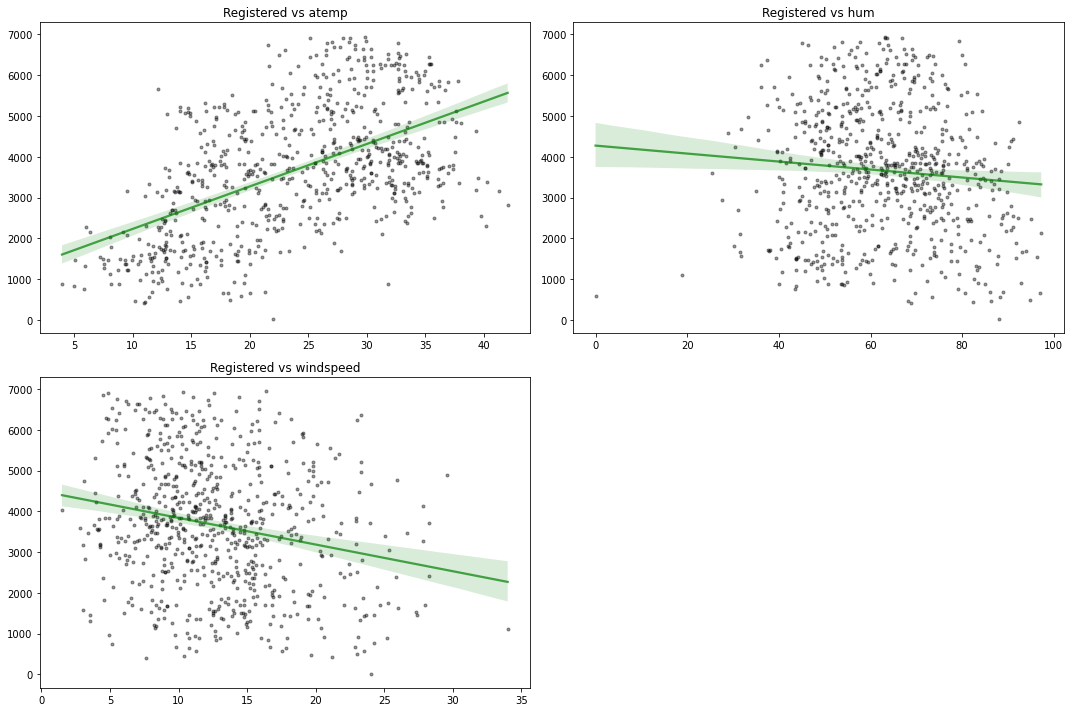

In [11]:
# Hacemos un regplot para compararlas con registered
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
axes = axes.flat

for i, colum in enumerate(lista_columnas):
    sns.regplot(
        x = df[colum],
        y = df["registered"],
        color = "black",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "green", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Registered vs {colum}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.delaxes(axes[-1])
fig.tight_layout()
plt.savefig("../imagenes/weather.png", facecolor="w");

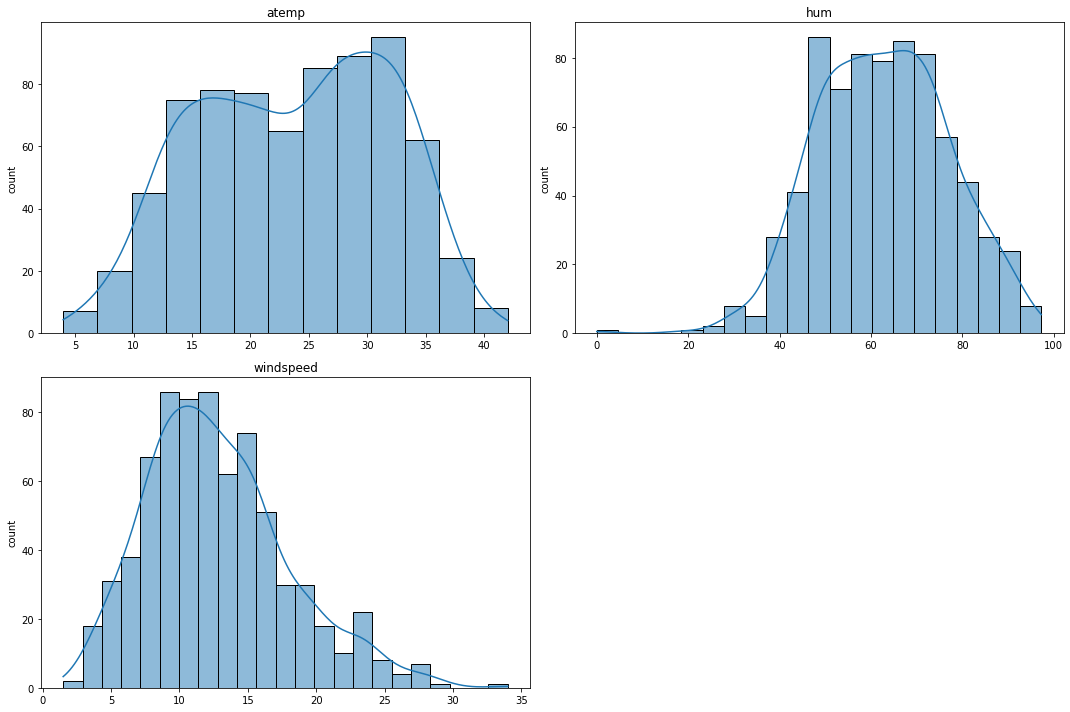

In [13]:
#Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

axes = axes.flat

for i, colum in enumerate(lista_columnas): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True,
        ax = axes[i])
    
    axes[i].set_title(colum)
    axes[i].tick_params()
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count")

fig.delaxes(axes[-1])
fig.tight_layout();

### Variables categóricas

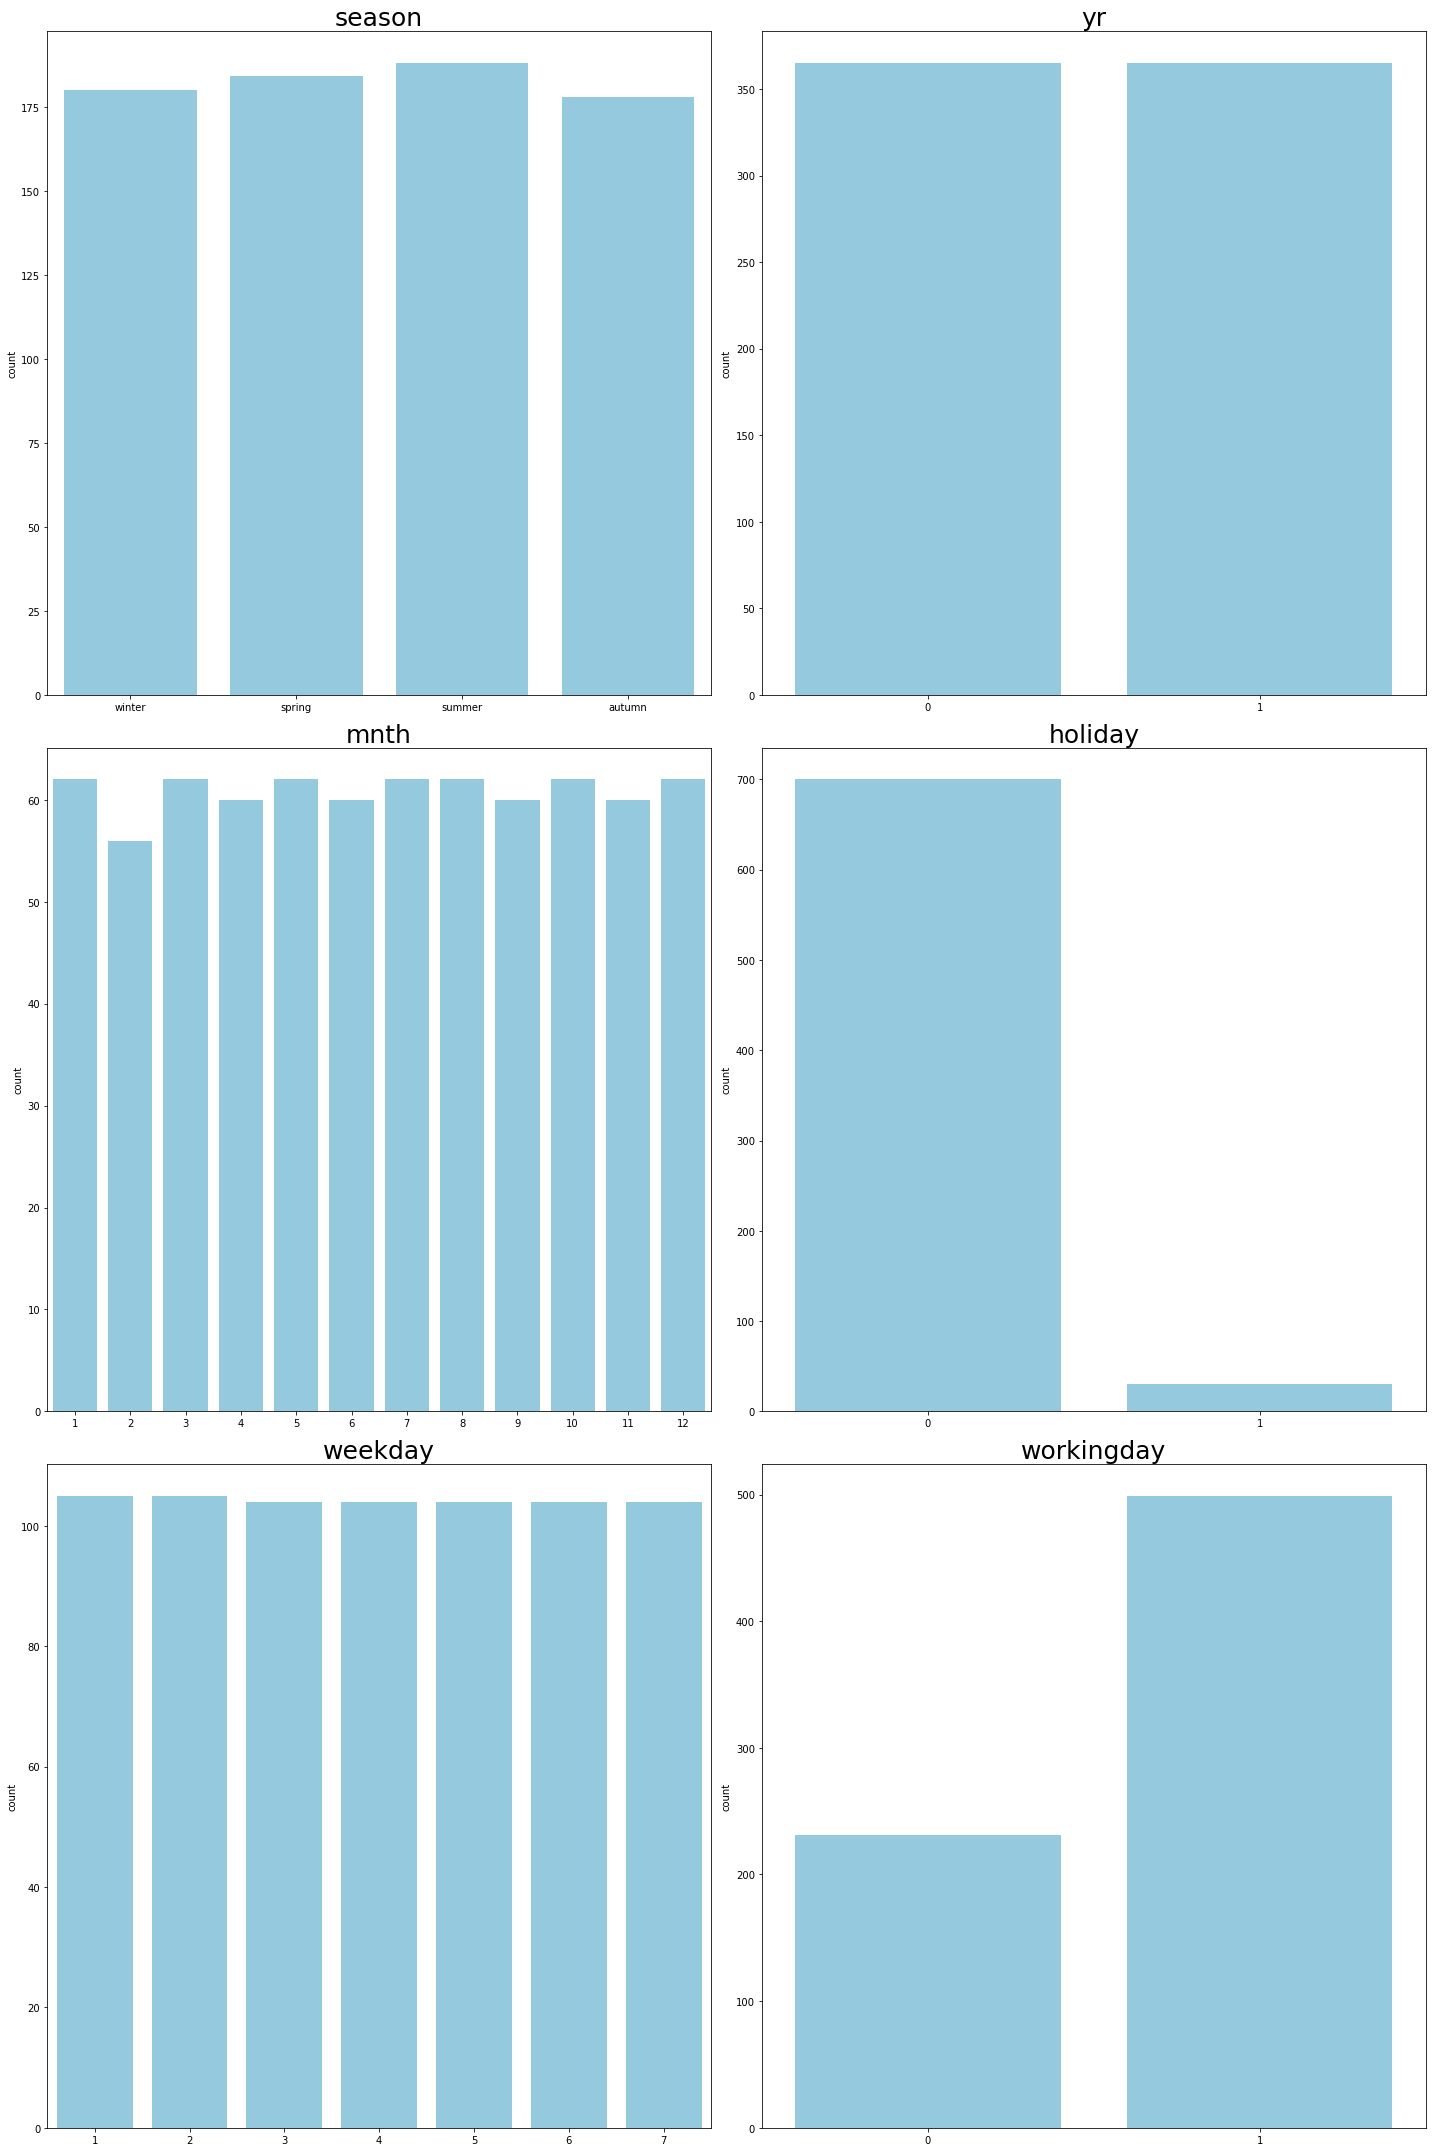

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30))

axes = axes.flat

columnas_cat = df.select_dtypes(include =['category','object']).columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        color = "skyblue",
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25)
    axes[i].tick_params()
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count")

fig.tight_layout();

### Variables categóricas con **registered**

In [15]:
df_hol = df.groupby("holiday").sum().reset_index()

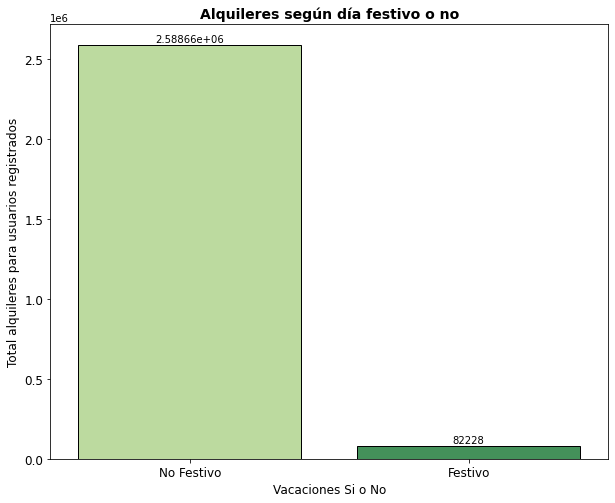

In [16]:
ax = sns.barplot(x= "holiday", y = "registered", data = df_hol, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres según día festivo o no", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Vacaciones Si o No", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["No Festivo","Festivo"])
plt.savefig('../imagenes/holiday.png', facecolor= "w")

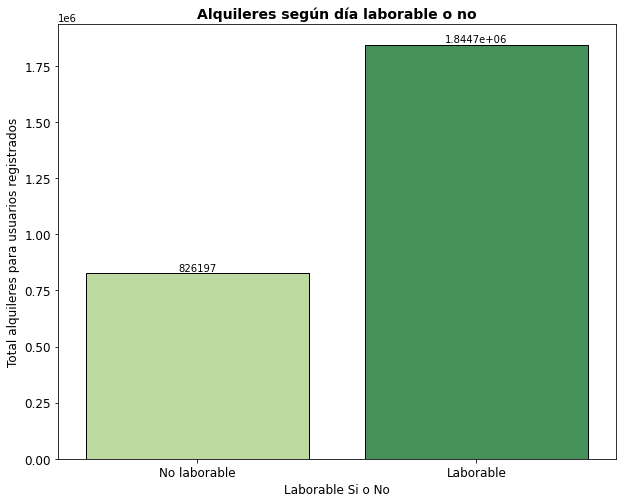

In [17]:
df_work = df.groupby("workingday").sum().reset_index()

ax = sns.barplot(x= "workingday", y = "registered", data = df_work, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres según día laborable o no", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Laborable Si o No", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["No laborable","Laborable"])
plt.savefig('../imagenes/workingday.png', facecolor= "w")

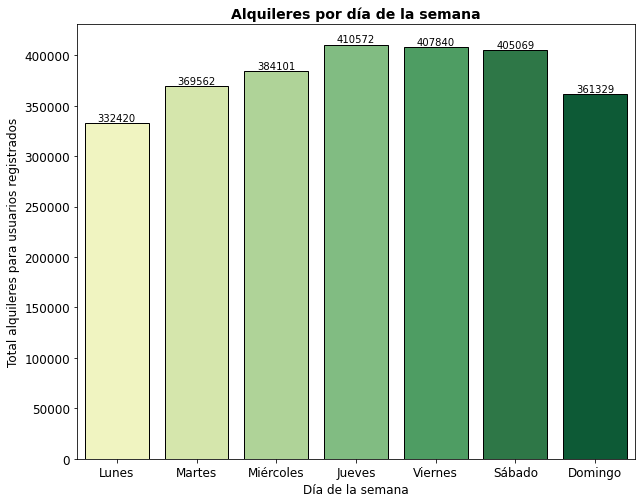

In [18]:
df_week = df.groupby("weekday").sum().reset_index()
ax = sns.barplot(x= "weekday", y = "registered", data = df_week, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres por día de la semana", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Día de la semana", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["Lunes","Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])
plt.savefig('../imagenes/weekday.png', facecolor= "w")

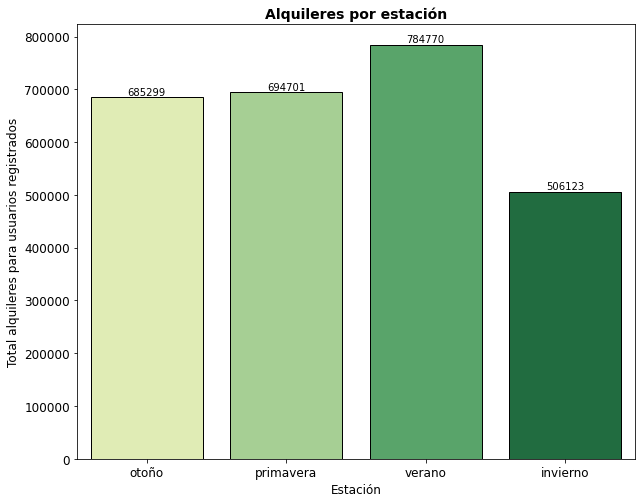

In [21]:
df_season = df.groupby("season").sum().reset_index()
ax = sns.barplot(x= "season", y = "registered", data = df_season, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres por estación", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Estación", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["otoño", "primavera", "verano", "invierno"])
plt.savefig('../imagenes/season.png', facecolor= "w");

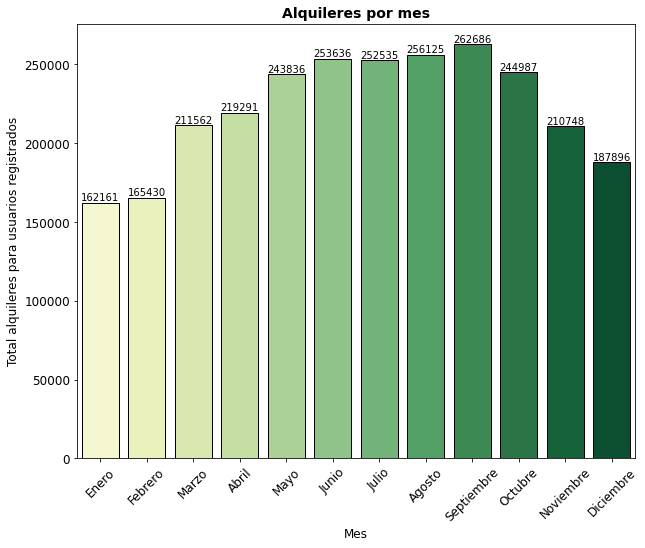

In [22]:
df_month = df.groupby("mnth").sum().reset_index()
ax = sns.barplot(x= "mnth", y = "registered", data = df_month, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres por mes", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Mes", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
plt.xticks(rotation = 45)
plt.savefig('../imagenes/mnth.png', facecolor= "w")

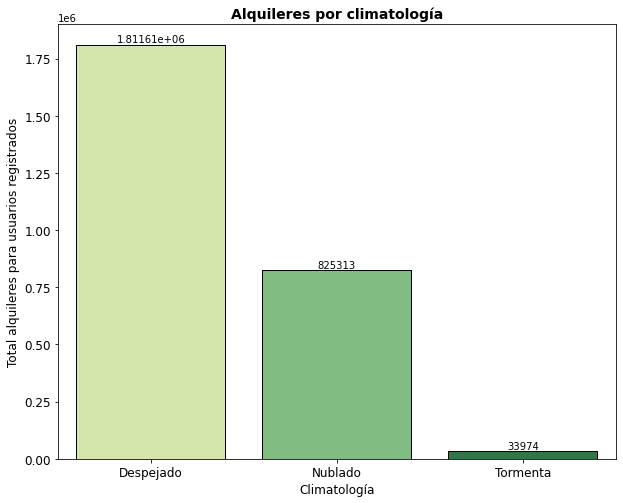

In [24]:
df_weather = df.groupby("weathersit").sum().reset_index()
ax = sns.barplot(x= "weathersit", y = "registered", data = df_weather, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres por climatología", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Climatología", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["Despejado", "Nublado", "Tormenta"])
plt.savefig('../imagenes/weathersit.png', facecolor= "w")

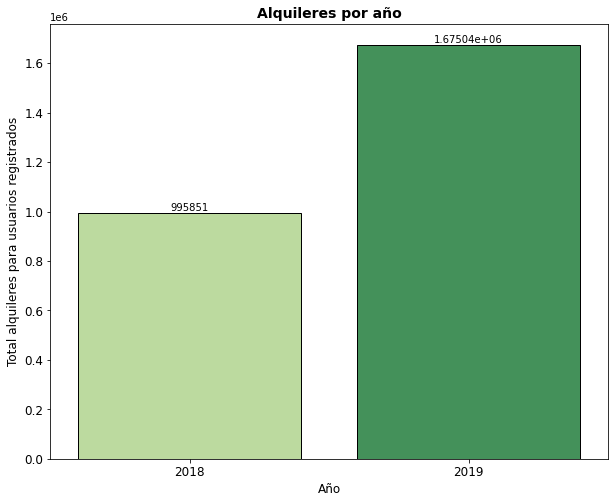

In [25]:
df_yr = df.groupby("yr").sum().reset_index()
ax = sns.barplot(x= "yr", y = "registered", data = df_yr, errwidth=0, palette= "YlGn", edgecolor ='black')
ax.bar_label(ax.containers[0])
plt.title(label = "Alquileres por año", fontsize = 14, fontweight='bold')
plt.tick_params(labelsize = 12)
ax.set_xlabel("Año", fontsize= 12)
ax.set_ylabel("Total alquileres para usuarios registrados", fontsize = 12)
ax.set_xticklabels(["2018", "2019"])

plt.savefig('../imagenes/yr.png', facecolor= "w")

In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670
2,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,1454
4,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,1518
